<a href="https://colab.research.google.com/github/VillaltaE/TelecomX_parte2/blob/main/TelecomX_LATAM_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Se importan las bibliotecas iniciales  necesarias para el desafio
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/VillaltaE/TelecomX_parte2/refs/heads/main/datos_tratados.csv')
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas.Diarias
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.16
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.97
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.43
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.22
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.76


In [ ]:
# se elimina 'customerID' porque no se usará en el análisis
df = df.drop(['customerID'],axis=1)
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas.Diarias
0,0.0,Female,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.16
1,0.0,Male,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.97
2,1.0,Male,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.43
3,1.0,Male,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.22
4,1.0,Female,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.76


In [ ]:
df.iloc[218]

,218
Churn,1.0
gender,Female
SeniorCitizen,0
Partner,0
Dependents,0
tenure,1
PhoneService,1
MultipleLines,0
InternetService,Fiber optic
OnlineSecurity,0


In [ ]:
#Cuentas mensuales y cuentas diarias tienen alta correlacion, se eliminará 'cuentas_diarias' del DF
df[['Charges.Monthly','Cuentas.Diarias']].corr()

,Charges.Monthly,Cuentas.Diarias
Charges.Monthly,1.000000,0.999996
Cuentas.Diarias,0.999996,1.000000


In [ ]:
df[['Charges.Monthly','Charges.Total']].corr()

,Charges.Monthly,Charges.Total
Charges.Monthly,1.000000,0.652219
Charges.Total,0.652219,1.000000


In [ ]:
# se elimina 'cuentas_diarias' del DF porque no se usará en el análisis
df = df.drop(['Cuentas.Diarias'],axis=1)
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0.0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0.0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,1.0,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,1.0,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,1.0,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   float64
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   int64  
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   int64  


In [ ]:
# Cambiar Female y Male 0 y 1
df['gender'] = df['gender'].replace(['Female','Male'],[0,1])
df.head()

/tmp/ipython-input-15-3607748643.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace(['Female','Male'],[0,1])


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0.0,0,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0.0,1,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,1.0,1,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,1.0,1,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,1.0,0,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


In [ ]:
# Verifique si hay valores únicos en cada columna
for col in df.columns:
  print(f"valores únicos en la columna'{col}': {df[col].nunique()}")
  if df[col].nunique() < 50: # Imprima los valores solamente si no hay muchos
    print(df[col].unique())
    print('-' * 50)  # Línea divisoria para mejor visualización

valores únicos en la columna'Churn': 2
[ 0.  1. nan]
--------------------------------------------------
valores únicos en la columna'gender': 2
[0 1]
--------------------------------------------------
valores únicos en la columna'SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores únicos en la columna'Partner': 2
[1 0]
--------------------------------------------------
valores únicos en la columna'Dependents': 2
[1 0]
--------------------------------------------------
valores únicos en la columna'tenure': 73
valores únicos en la columna'PhoneService': 2
[1 0]
--------------------------------------------------
valores únicos en la columna'MultipleLines': 3
['0' '1' 'No phone service']
--------------------------------------------------
valores únicos en la columna'InternetService': 3
['DSL' 'Fiber optic' '0']
--------------------------------------------------
valores únicos en la columna'OnlineSecurity': 3
['0' '1' 'No internet service']
-------------------

In [ ]:
#Duplicados
print("Numero de duplicados", df.duplicated().sum())

Numero de duplicados 22


In [ ]:
# Nulos
print("Numero de Nulos", df.isnull().sum())

Numero de Nulos Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total         0
dtype: int64


In [ ]:
# Eliminando las filas con valores nulos en 'Churn'
df = df[df['Churn'].notnull()]
print("Número de filas después de eliminar los nulos en 'Churn':", len(df))

Número de filas después de eliminar los nulos en 'Churn': 7043


In [ ]:
# Vacíos o en blanco
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Nulos
print("Numero de Nulos", df.isnull().sum())

Numero de Nulos Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [ ]:
#revisión de Df despues de eliminar valores nulos en Churn
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   float64
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  
 17  

#**Encoding**

In [ ]:
df.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total'],
      dtype='object')

In [ ]:
#Crear variable objetivo, separada de las variables explicativas

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),
 ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']),
                                 remainder='passthrough',
                                  sparse_threshold=0,
                                  force_int_remainder_cols=False)

In [ ]:
df_encoded = one_hot.fit_transform(df)

In [ ]:
one_hot.get_feature_names_out()

array(['onehotencoder__MultipleLines_0', 'onehotencoder__MultipleLines_1',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__InternetService_0',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__OnlineSecurity_0',
       'onehotencoder__OnlineSecurity_1',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineBackup_0', 'onehotencoder__OnlineBackup_1',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__DeviceProtection_0',
       'onehotencoder__DeviceProtection_1',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__TechSupport_0', 'onehotencoder__TechSupport_1',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__StreamingTV_0', 'onehotencoder__StreamingTV_1',
       'onehotencoder__StreamingTV_No internet service',
       'onehotencoder__StreamingMovies_0',
    

In [ ]:
#Data frame producto de OneHot Encoder
df_ohe = pd.DataFrame(df_encoded, columns=one_hot.get_feature_names_out())

In [ ]:
df_ohe.shape

(7043, 41)

In [ ]:
#Verificación de la Proporción de Cancelación (Churn)
df['Churn'].value_counts(normalize=True) #esta desbalanceado

,proportion
Churn,
0.0,0.73463
1.0,0.26537


##Normalización de los datos

In [ ]:
#Normalizacón de datos
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_norm = pd.DataFrame(scaler.fit_transform(df_ohe), columns=df_ohe.columns)
df_norm.head()

,onehotencoder__MultipleLines_0,onehotencoder__MultipleLines_1,onehotencoder__MultipleLines_No phone service,onehotencoder__InternetService_0,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__OnlineSecurity_0,onehotencoder__OnlineSecurity_1,onehotencoder__OnlineSecurity_No internet service,onehotencoder__OnlineBackup_0,...,remainder__Churn,remainder__gender,remainder__SeniorCitizen,remainder__Partner,remainder__Dependents,remainder__tenure,remainder__PhoneService,remainder__PaperlessBilling,remainder__Charges.Monthly,remainder__Charges.Total
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.125000,1.0,1.0,0.471144,0.066294
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.125000,1.0,0.0,0.414428,0.060420
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.055556,1.0,1.0,0.553731,0.030239
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.180556,1.0,1.0,0.793532,0.140670
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.041667,1.0,1.0,0.653234,0.028687


##Correlación

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   float64
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  
 17  

In [ ]:
#Para correlacionar se usrá un sub conjunto de variables númericas
df_numericas = df.select_dtypes(include=['float64', 'int64'])
df_numericas.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total
0,0.0,0,0,1,1,9,1,1,65.6,593.30
1,0.0,1,0,0,0,9,1,0,59.9,542.40
2,1.0,1,0,0,0,4,1,1,73.9,280.85
3,1.0,1,1,1,0,13,1,1,98.0,1237.85
4,1.0,0,1,1,0,3,1,1,83.9,267.40


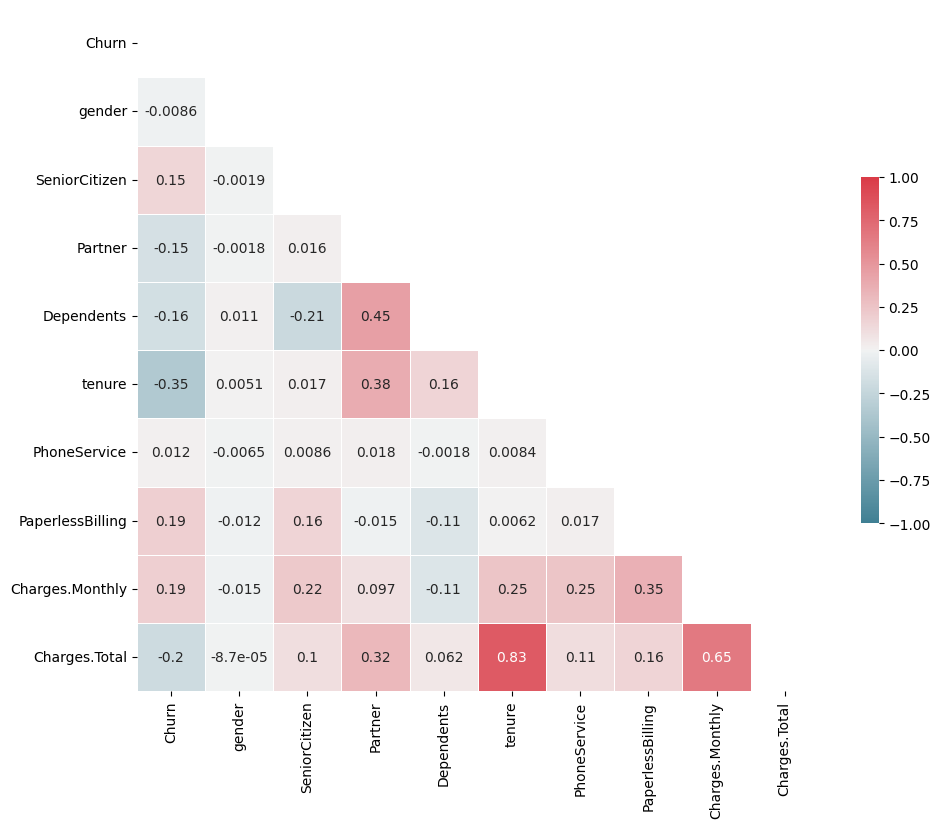

In [ ]:
# Mapa de calor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Correlación
corr = df_numericas.corr()

# ¿Qué factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

##**Análisis dirigido**

<Axes: xlabel='Churn', ylabel='tenure'>

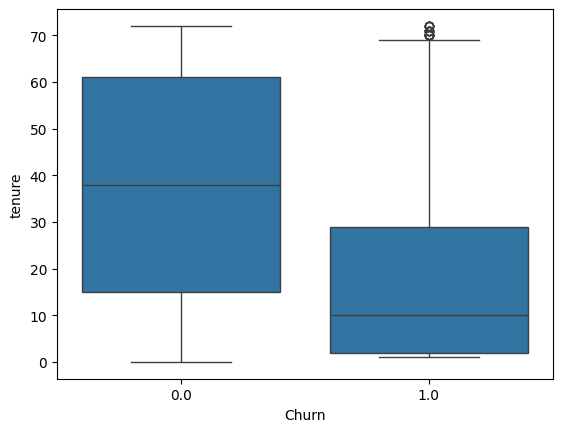

In [ ]:
#boxplot churn vs tenure
sns.boxplot(x='Churn', y='tenure', data=df)


<Axes: xlabel='Churn', ylabel='Charges.Total'>

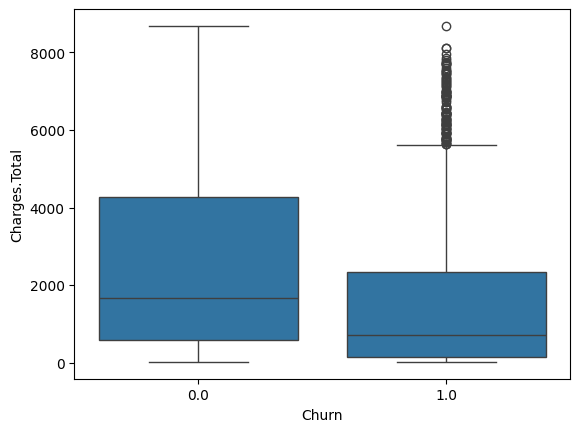

In [ ]:
#boxplot chrrn vs cargos totales
sns.boxplot(x='Churn', y='Charges.Total', data=df)

##**Separación de datos**

In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split
y = df['Churn']
X = df.drop('Churn',axis=1)


In [ ]:
X= one_hot.fit_transform(X)

In [ ]:
X.shape

(7043, 40)

In [ ]:
#Data frame producto de OneHot Encoder
df_X = pd.DataFrame(X, columns=one_hot.get_feature_names_out())
df_X.columns

Index(['onehotencoder__MultipleLines_0', 'onehotencoder__MultipleLines_1',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__InternetService_0',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__OnlineSecurity_0', 'onehotencoder__OnlineSecurity_1',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineBackup_0', 'onehotencoder__OnlineBackup_1',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__DeviceProtection_0',
       'onehotencoder__DeviceProtection_1',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__TechSupport_0', 'onehotencoder__TechSupport_1',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__StreamingTV_0', 'onehotencoder__StreamingTV_1',
       'onehotencoder__StreamingTV_No internet service',
       'onehotencoder__StreamingMovies_0', 'onehotenco

In [ ]:
one_hot.get_feature_names_out()

array(['onehotencoder__MultipleLines_0', 'onehotencoder__MultipleLines_1',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__InternetService_0',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__OnlineSecurity_0',
       'onehotencoder__OnlineSecurity_1',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineBackup_0', 'onehotencoder__OnlineBackup_1',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__DeviceProtection_0',
       'onehotencoder__DeviceProtection_1',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__TechSupport_0', 'onehotencoder__TechSupport_1',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__StreamingTV_0', 'onehotencoder__StreamingTV_1',
       'onehotencoder__StreamingTV_No internet service',
       'onehotencoder__StreamingMovies_0',
    

In [ ]:
pd.DataFrame(X, columns=one_hot.get_feature_names_out())

,onehotencoder__MultipleLines_0,onehotencoder__MultipleLines_1,onehotencoder__MultipleLines_No phone service,onehotencoder__InternetService_0,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__OnlineSecurity_0,onehotencoder__OnlineSecurity_1,onehotencoder__OnlineSecurity_No internet service,onehotencoder__OnlineBackup_0,...,onehotencoder__PaymentMethod_Mailed check,remainder__gender,remainder__SeniorCitizen,remainder__Partner,remainder__Dependents,remainder__tenure,remainder__PhoneService,remainder__PaperlessBilling,remainder__Charges.Monthly,remainder__Charges.Total
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,9.0,1.0,1.0,65.60,593.30
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,9.0,1.0,0.0,59.90,542.40
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0,73.90,280.85
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,13.0,1.0,1.0,98.00,1237.85
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,3.0,1.0,1.0,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,13.0,1.0,0.0,55.15,742.90
7039,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,22.0,1.0,1.0,85.10,1873.70
7040,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,50.30,92.75
7041,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,1.0,67.0,1.0,0.0,67.85,4627.65


## Transformando la variable respuesta

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
y = label_encoder.fit_transform(y)

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

#  Ajustando modelos

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5,stratify=y)

## Modelo de referencia - Baseline

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
#Este modelo se adapta a la respuesta de mayor frecuencia, en este caso es 'No' a la inversion
dummy = DummyClassifier()
dummy.fit(X_train,y_train)
dummy.score(X_test,y_test)

0.73450070989115

## Árboles de Decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Se usrá una max_depth de 4
modelo_arbol = DecisionTreeClassifier(max_depth=4,random_state=5)
modelo_arbol.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=4, random_state=5)

In [ ]:
modelo_arbol.score(X_test,y_test)

0.8017037387600567

In [ ]:
from sklearn.tree import plot_tree


In [ ]:
valores_columnas =['onehotencoder__MultipleLines_0', 'onehotencoder__MultipleLines_1',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__InternetService_0',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__OnlineSecurity_0', 'onehotencoder__OnlineSecurity_1',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineBackup_0', 'onehotencoder__OnlineBackup_1',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__DeviceProtection_0',
       'onehotencoder__DeviceProtection_1',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__TechSupport_0', 'onehotencoder__TechSupport_1',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__StreamingTV_0', 'onehotencoder__StreamingTV_1',
       'onehotencoder__StreamingTV_No internet service',
       'onehotencoder__StreamingMovies_0', 'onehotencoder__StreamingMovies_1',
       'onehotencoder__StreamingMovies_No internet service',
       'onehotencoder__Contract_Month-to-month',
       'onehotencoder__Contract_One year', 'onehotencoder__Contract_Two year',
       'onehotencoder__PaymentMethod_Bank transfer (automatic)',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMethod_Electronic check',
       'onehotencoder__PaymentMethod_Mailed check', 'remainder__gender',
       'remainder__SeniorCitizen', 'remainder__Partner',
       'remainder__Dependents', 'remainder__tenure', 'remainder__PhoneService',
       'remainder__PaperlessBilling', 'remainder__Charges.Monthly',
       'remainder__Charges.Total']

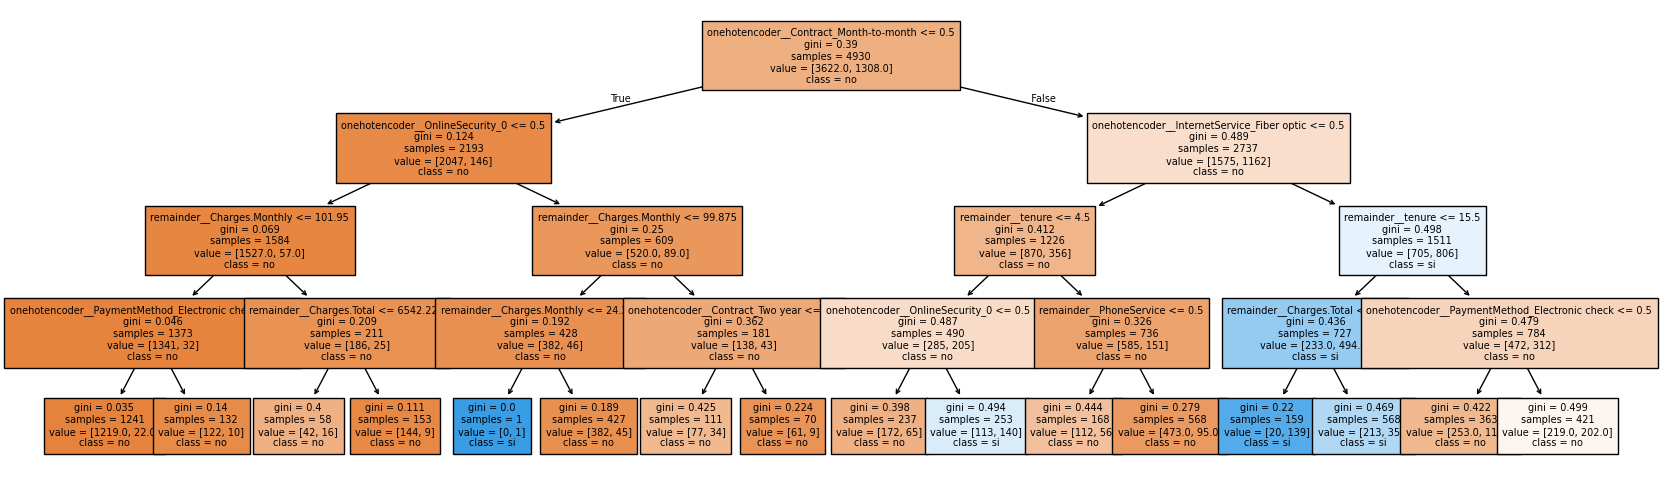

In [ ]:
plt.figure(figsize=(20,6))
plot_tree(modelo_arbol,
          filled=True,
          class_names=['no','si'],
          fontsize =7,
          feature_names=valores_columnas);

## Normalizando los datos

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train)

In [ ]:
pd.DataFrame(X_train_normalizado,columns=valores_columnas)

,onehotencoder__MultipleLines_0,onehotencoder__MultipleLines_1,onehotencoder__MultipleLines_No phone service,onehotencoder__InternetService_0,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__OnlineSecurity_0,onehotencoder__OnlineSecurity_1,onehotencoder__OnlineSecurity_No internet service,onehotencoder__OnlineBackup_0,...,onehotencoder__PaymentMethod_Mailed check,remainder__gender,remainder__SeniorCitizen,remainder__Partner,remainder__Dependents,remainder__tenure,remainder__PhoneService,remainder__PaperlessBilling,remainder__Charges.Monthly,remainder__Charges.Total
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.791667,1.0,1.0,0.809950,0.632154
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.763889,1.0,1.0,0.854726,0.660541
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.666667,1.0,1.0,0.521393,0.406906
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.111111,1.0,1.0,0.267662,0.048419
4,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.986111,1.0,1.0,0.854726,0.847738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.375000,1.0,0.0,0.319403,0.160691
4926,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.486111,1.0,1.0,0.944776,0.449486
4927,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.361111,1.0,1.0,0.331343,0.147311
4928,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.041667,1.0,0.0,0.270647,0.014182


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train_normalizado,y_train)

KNeighborsClassifier()

In [ ]:
X_test_normalizado = normalizacion.transform(X_test)

In [ ]:
knn.score(X_test_normalizado,y_test)

0.7624230951254141

In [ ]:
prediccion_knn = knn.predict(X_test)

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(max_depth=2)
random_forest .fit(X_train, y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento  es: {random_forest .score(X_train,y_train)}')

La exactitud del modelo con el conjunto de entrenamiento  es: 0.7616632860040567


In [ ]:
random_forest.score(X_test,y_test)

0.7747278750591576

In [ ]:
rf_prediccion = random_forest.predict(X_test)

## Escogiendo y serializando el mejor modelo

In [ ]:
lista =[('dummy',dummy, X_test),('de arbol',modelo_arbol,X_test),('knn',knn,X_test_normalizado),('random forest',random_forest,X_test)]
#
for i in lista:
  print(f'La exactitud del modelo {i[0]} es {i[1].score(i[2],y_test)}')

La exactitud del modelo dummy es 0.73450070989115
La exactitud del modelo de arbol es 0.8017037387600567
La exactitud del modelo knn es 0.7624230951254141
La exactitud del modelo random forest es 0.7747278750591576


#Evaluación de modelos

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
prediccion_arbol = modelo_arbol.predict(X_test)
matriz_confusion =confusion_matrix(y_test, prediccion_arbol)
print(matriz_confusion)

[[1420  132]
 [ 287  274]]


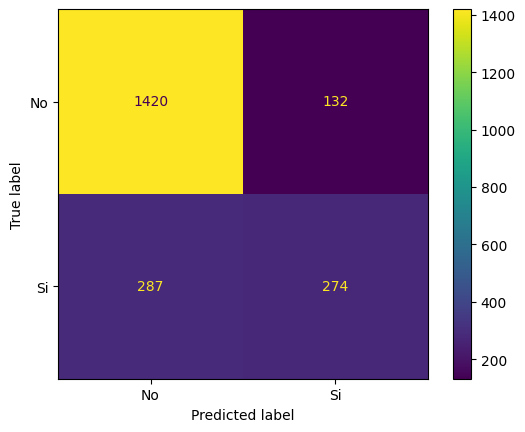

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion,display_labels=['No','Si'])
visualizacion.plot();

In [ ]:
rf_prediccion =  random_forest.predict(X_test)
matriz_confusion =confusion_matrix(y_test, rf_prediccion)
print(matriz_confusion)

[[1525   27]
 [ 449  112]]


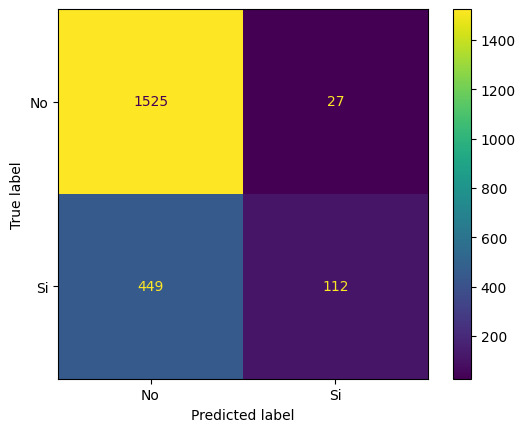

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion,display_labels=['No','Si'])
visualizacion.plot();

- Para una evaluación completa de un modelo de clasificación, podemos explorar métricas que evalúan la tasa de acierto general y también para cada clase de la variable objetivo de forma individual. Extrae las métricas de precisión, recall, precisión y F1-Score de los modelos de clasificación generados en el desafío de la clase 1. La biblioteca Scikit-Learn tiene funciones para calcular cada una de las métricas, solo necesitas importar y utilizar como parámetros los valores reales y previstos por el modelo.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [ ]:
print(f'La exactitud(accuracy) del modelo árbol es: {accuracy_score(y_test, prediccion_arbol)}')
print(f'La precisión del modelo árbol  es: {precision_score(y_test, prediccion_arbol)})')
print(f'La sensibilidad(recall) del modelo árbol  es: {recall_score(y_test, prediccion_arbol)}')
print(f'La F1 del modelo árbol es: {f1_score(y_test, prediccion_arbol)}')

La exactitud(accuracy) del modelo árbol es: 0.8017037387600567
La precisión del modelo árbol  es: 0.6748768472906403)
La sensibilidad(recall) del modelo árbol  es: 0.48841354723707664
La F1 del modelo árbol es: 0.5667011375387797


In [ ]:
print(f'La exactitud(accuracy) del modelo knn es: {accuracy_score(y_test, prediccion_knn)}')
print(f'La precisión del modelo knn  es: {precision_score(y_test, prediccion_knn)})')
print(f'La sensibilidad(recall) del modelo knn  es: {recall_score(y_test, prediccion_knn)}')
print(f'La F1 del modelo knn es: {f1_score(y_test, prediccion_knn)}')

La exactitud(accuracy) del modelo knn es: 0.73450070989115
La precisión del modelo knn  es: 0.0)
La sensibilidad(recall) del modelo knn  es: 0.0
La F1 del modelo knn es: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(f'La exactitud(accuracy) del modelo rf es: {accuracy_score(y_test, rf_prediccion)}')
print(f'La precisión del modelo rf  es: {precision_score(y_test, rf_prediccion)}')
print(f'La sensibilidad(recall) del modelo rf  es: {recall_score(y_test, rf_prediccion)}')
print(f'La F1 del modelo rf es: {f1_score(y_test, rf_prediccion)}')

La exactitud(accuracy) del modelo rf es: 0.7747278750591576
La precisión del modelo rf  es: 0.8057553956834532
La sensibilidad(recall) del modelo rf  es: 0.19964349376114082
La F1 del modelo rf es: 0.32


## Para determinar si hay overfiiting o underfittin se usará la validación cruzada

In [ ]:
from sklearn.model_selection import KFold,cross_validate

In [ ]:
#Se usará la validación cruzada en modelo árbol porque es el que tiene la mayor exactitud
modelo_arbol = DecisionTreeClassifier(max_depth=4,random_state=5)
kfold = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo_arbol,X,y,cv=kfold)
cv_resultados

{'fit_time': array([0.02323008, 0.01808906, 0.02615094, 0.02419066, 0.02327394]),
 'score_time': array([0.00127029, 0.00189114, 0.0017364 , 0.00178576, 0.00169325]),
 'test_score': array([0.79630944, 0.77643719, 0.78708304, 0.78480114, 0.79119318])}

In [ ]:
cv_resultados['test_score']

array([0.79630944, 0.77643719, 0.78708304, 0.78480114, 0.79119318])

In [ ]:
# Se hizo la validación cruzada del modelo con la segunda exactitud mas alta, knn
knn=KNeighborsClassifier()
kfold = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(knn,X,y,cv=kfold)
cv_resultados

{'fit_time': array([0.00626111, 0.00240731, 0.00406718, 0.00259399, 0.00239444]),
 'score_time': array([0.09739518, 0.09290576, 0.09839344, 0.09250879, 0.0940237 ]),
 'test_score': array([0.76579134, 0.74095103, 0.77146913, 0.76917614, 0.77840909])}

In [ ]:
cv_resultados['test_score']

array([0.76579134, 0.74095103, 0.77146913, 0.76917614, 0.77840909])

#Estratificando los datos

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
modelo_arbol = DecisionTreeClassifier(max_depth = 4,random_state=5)
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo_arbol, X, y, cv=skf, scoring = 'recall')


In [ ]:
def intervalo_confianza(resultados):
  promedio = resultados.mean()
  desvio_std = resultados.std()
  return f' El intervalo de confianza es:[{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]'

In [ ]:
intervalo_confianza(cv_resultados['test_score'])

' El intervalo de confianza es:[0.37553689031598925,0.5244100638495424]'

##Balanceo de los datos

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversampling = SMOTE()
x_balanceada,y_balanceada = oversampling.fit_resample(X,y)

In [ ]:
y_balanceada = pd.Series(y_balanceada)
y_balanceada.value_counts(normalize=True)


,proportion
0,0.5
1,0.5


In [ ]:
modelo_arbol = DecisionTreeClassifier(max_depth = 4,random_state=5)
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo_arbol, x_balanceada, y_balanceada, cv=skf, scoring = 'recall')

In [ ]:
intervalo_confianza(cv_resultados['test_score'])

' El intervalo de confianza es:[0.8616359417044364,0.8871122245090399]'

##Pipeline para validación

###Oversampling

In [ ]:
from imblearn.pipeline import Pipeline as imbpipeline

In [ ]:
modelo_arbol = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('oversample',SMOTE()),('arbol',modelo_arbol)])

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring = 'recall')

In [ ]:
intervalo_confianza(cv_resultados['test_score'])

' El intervalo de confianza es:[0.49923619524767393,0.664967902184621]'

###Undersampling

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
modelo_arbol = DecisionTreeClassifier(max_depth = 4,random_state=5)
pipeline = imbpipeline([('undersample',NearMiss(version=3)),('arbol',modelo_arbol)])
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring = 'recall')

In [ ]:
intervalo_confianza(cv_resultados['test_score'])

' El intervalo de confianza es:[0.4860765166140574,0.9297569481391362]'

###Probando modelo

In [ ]:
undersample = NearMiss(version=3)
x_balanceada,y_balanceada = undersample.fit_resample(X,y)

In [ ]:
from sklearn.metrics import classification_report

              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1552
           1       0.56      0.76      0.64       561

    accuracy                           0.77      2113
   macro avg       0.73      0.77      0.74      2113
weighted avg       0.81      0.77      0.78      2113



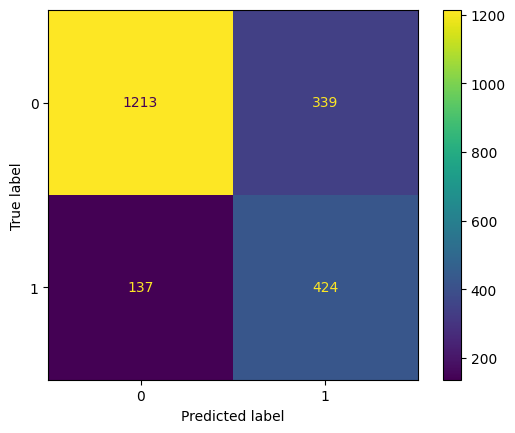

In [ ]:
modelo_arbol = DecisionTreeClassifier(max_depth = 4,random_state=5)
modelo_arbol.fit(x_balanceada,y_balanceada)
y_previsto = modelo_arbol.predict(X_test)

print(classification_report(y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto);

##Salvando el modelo

In [ ]:
import pickle

In [ ]:
with open('modelo_onehotencoder.pkl','wb') as archivo:
  pickle.dump(one_hot,archivo)

In [ ]:
with open('modelo_champion.pkl','wb') as archivo:
  pickle.dump(modelo_arbol,archivo)

In [ ]:
df.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total'],
      dtype='object')

In [ ]:
nuevo_dato = {
    'gender': [1],
    'SeniorCitizen':[1],
    'Partner':[0],
    'Dependents': [0],
    'tenure': [3],
    'PhoneService': [1],
    'MultipleLines': ['0'],
    'InternetService': ['DSL'],
    'OnlineSecurity': ['0'],
    'OnlineBackup': ['1'],
    'DeviceProtection': ['0'],
    'TechSupport': ['0'],
    'StreamingTV': ['1'],
    'StreamingMovies': ['1'],
    'Contract': ['Month-to-month'],
    'PaperlessBilling': [1],
    'PaymentMethod': ['Electronic check'],
    'Charges.Monthly': [5],
    'Charges.Total': [70]
}


In [ ]:
modelo_one_hot  = pd.read_pickle('/content/modelo_onehotencoder.pkl')
modelo_arbol = pd.read_pickle('/content/modelo_champion.pkl')

In [ ]:
nuevo_dato_df = pd.DataFrame(nuevo_dato)

In [ ]:
nuevo_dato = modelo_one_hot.transform(nuevo_dato_df)

In [ ]:
modelo_arbol.predict(nuevo_dato)

array([0])

#**Conclusiones**

El modelo arbol fue el que mostró la mayor exactitud, como se aprecia en la siguiente tabla:

**Modelo árbol.**

La exactitud(accuracy) del modelo árbol es: 0.8017037387600567.

La precisión del modelo árbol  es: 0.6748768472906403.

La sensibilidad(recall) del modelo árbol  es: 0.48841354723707664.

La F1 del modelo árbol es: 0.5667011375387797.

**Modelo KNN**

La exactitud(accuracy) del modelo knn es: 0.73450070989115.

La precisión del modelo knn  es: 0.0.

La sensibilidad(recall) del modelo knn  es: 0.0.

La F1 del modelo knn es: 0.0.

Este modelo no generalizó bien el conjunto de datos de entrenamiento, por eso sólo mostró valores en la exactitud.

**Modelo random forest**

La exactitud(accuracy) del modelo rf es: 0.7747278750591576.

La precisión del modelo rf  es: 0.8057553956834532.

La sensibilidad(recall) del modelo rf  es: 0.19964349376114082.

La F1 del modelo rf es: 0.32

**Undersampling**
En vista de que los datos estan desbalanceados, se  procedio a usar el
método 'NearMiss' para balancear los datos.
Obteneniendose un nivel de confianza de :

El intervalo de confianza es:[0.4860765166140574,0.9297569481391362],
y la siguiente matrix de confusíon :


          precision    recall  f1-score   support

               0       0.90      0.78      0.84      1552
               1       0.56      0.76      0.64       561

        accuracy                           0.77      2113
       macro avg       0.73      0.77      0.74      2113
    weighted avg       0.81      0.77      0.78      2113



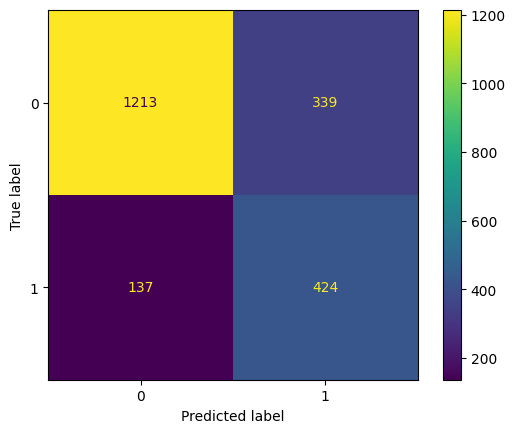